### Linear Regression

Step 1: Libraries ခေါ်ယူခြင်း (Importing Libraries)
-   Data Analysis နှင့် Visualization လုပ်ငန်းစဉ်များအတွက် မရှိမဖြစ်လိုအပ်သော Tools (Libraries) များကို Python env ထဲသို့ ခေါ်ယူလိုက်ခြင်း ဖြစ်သည်။

In [1]:
import pandas as pd          
from sklearn import datasets     

Step 2: စမ်းသပ်ရန် Data ဖန်တီးခြင်း (Generating Synthetic Data)
-   ဒီအဆင့်မှာတော့ Regression ပုစ္ဆာတစ်ခုကို လေ့ကျင့်နိုင်ဖို့အတွက် Python သုံးပြီး (Random Data) များကို ကိုယ်တိုင်ဖန်တီးလိုက်တာ ဖြစ်ပါတယ်

In [2]:
# creating the random data
# နမူနာ ၃၀၀၊ Feature ၁ ခုနှင့် (Noise) ၃၀ ပါဝင်သော Regression Data များ ထုတ်ယူခြင်း
X, y = datasets.make_regression(n_samples=300, n_features=1, noise=30)

# ရရှိလာသော array များကို DataFrame (Table) အဖြစ် ပြောင်းလဲခြင်း
df = pd.DataFrame(X, y)

# Index ကို Column အဖြစ် ပြောင်းလဲပြီး နာမည်အမှန် ပြန်ပေးခြင်း
df.reset_index(inplace=True) # Index ကို ပုံမှန် column အဖြစ် ပြန်ထားခြင်း
df.rename(columns={'index':'x' , 0:'y' }, inplace=True) # Column နာမည်များကို x နှင့် y ဟု ပြောင်းခြင်း

# Data ၏ ပထမဆုံး ၅ ကြောင်းကို ထုတ်ကြည့်ခြင်း
df.head()

,x,y
0,-0.869429,-0.117235
1,-71.502742,-0.394030
2,-33.471608,0.065704
3,18.434079,-0.549889
4,50.298010,0.314047


Step 3: Data Visualization (ဒေတာများကို ပုံဖော်ကြည့်ခြင်း)
-   ဖန်တီးလိုက်တဲ့ x နဲ့ y တို့ကြားမှာ ဘယ်လို ဆက်စပ်မှု (Relationship) ရှိနေသလဲဆိုတာကို Scatter Plot အစက်ချပုံစံနဲ့ မြင်သာအောင် ကြည့်ရှုတဲ့ အဆင့်ဖြစ်ပါတယ်။

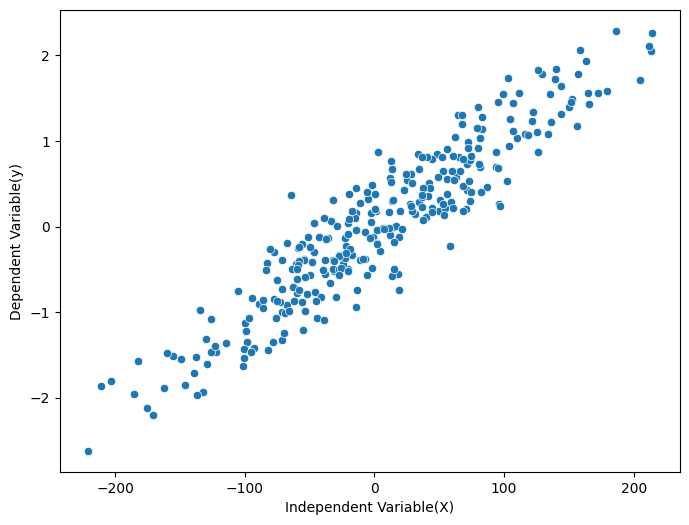

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns   

# visualize the data using scatter plot
# ပုံ၏ အရွယ်အစားကို အလျား ၈ လက်မ၊ အနံ ၆ လက်မ သတ်မှတ်ခြင်း
plt.figure(figsize=(8,6))

# Seaborn ကိုသုံးပြီး x နှင့် y ၏ ဆက်စပ်မှုကို အစက်ချပုံစံဖြင့် ဆွဲခြင်း
sns.scatterplot(x=df.x, y=df.y)

# X-axis နှင့် Y-axis တို့တွင် နာမည်များ သတ်မှတ်ပေးခြင်း
plt.xlabel("Independent Variable(X)")
plt.ylabel("Dependent Variable(y)")

# ဖန်တီးထားသော ပုံကို ထုတ်ပြခြင်း
plt.show()

Step 4: ပျမ်းမျှတန်ဖိုးများ တွက်ချက်ခြင်း (Calculating Mean Values)
-   Linear Regression မျဉ်းကြောင်း၏ Slope နှင့် Intercept တို့ကို ကိုယ်တိုင် (Manual) တွက်ချက်ရန်အတွက် ပထမဦးဆုံးလိုအပ်သော $x$ နှင့် $y$ တို့၏ ပျမ်းမျှတန်ဖိုး (Mean) များကို ရှာဖွေသည့် အဆင့်ဖြစ်ပါတယ်။

In [5]:
 # calculate slope and intercept
mean_x=df.x.mean()
mean_y=df.y.mean()

mean_x , mean_y

(np.float64(4.758893510292407), np.float64(0.025372252458912142))

Step 5: Slope နှင့် Intercept ကို တွက်ချက်ခြင်း (Calculating Slope and Intercept)
-   Linear Regression မျဉ်းကြောင်းတစ်ခု၏ ပုံသေနည်းဖြစ်သော $y = mx + c$ တွင် ပါဝင်သည့် Slope ($m$) နှင့် Intercept ($c$) တန်ဖိုးများကို ပုံသေနည်း (Least Squares Method) အသုံးပြုကာ ကိုယ်တိုင်တွက်ချက်သည့် အဆင့်ဖြစ်ပါသည်။

In [7]:
# slope (m) ကို တွက်ချက်ခြင်း
# အပေါ်ကိန်း (Numerator): (x - mean_x) နှင့် (y - mean_y) တို့၏ မြှောက်လဒ်များကို ပေါင်းခြင်း
numerator = sum((df.x - mean_x) * (df.y - mean_y))

# အောက်ကိန်း (Denominator): (x - mean_x) နှစ်ထပ်ကိန်းများကို ပေါင်းခြင်း
denomenator = sum((df.x - mean_x)**2)

# Slope တန်ဖိုးကို ရှာဖွေခြင်း
slope = numerator / denomenator
print('Slope:', slope)

# intercept (c) ကို တွက်ချက်ခြင်း
# c = mean_y - (slope * mean_x) ပုံသေနည်းကို သုံးခြင်း
intercept = mean_y - (slope * mean_x)
print('Intercept:', intercept)

Slope: 0.010551828361449111
Intercept: -0.0248427750521074


Step 6: Prediction (ခန့်မှန်းချက်များ တွက်ချက်ခြင်း)
-   အရှေ့အဆင့်မှာ ရရှိခဲ့တဲ့ Slope ($m$) နဲ့ Intercept ($c$ သို့မဟုတ် $b$) တန်ဖိုးတွေကို အသုံးပြုပြီး Linear Regression ပုံသေနည်း $y = mx + b$ အတိုင်း ခန့်မှန်းရလဒ် (Predicted Values) များကို တွက်ချက်တဲ့ အဆင့်ဖြစ်ပါတယ်။

In [8]:
# y = mx + b (Linear Regression ပုံသေနည်း)

# ရရှိထားသော slope နှင့် intercept ကိုသုံးပြီး y တန်ဖိုးများကို ခန့်မှန်းခြင်း
y_pred_cal = (slope * df.x) + intercept

# ခန့်မှန်းရရှိလာသော y တန်ဖိုးများကို ထုတ်ကြည့်ခြင်း
y_pred_cal

0     -0.034017
1     -0.779327
2     -0.378029
3      0.169670
4      0.505893
         ...   
295   -0.605349
296    0.171370
297    1.699078
298   -0.935189
299    1.059317
Name: x, Length: 300, dtype: float64

Step 7: Regression Line (ခန့်မှန်းမျဉ်းကြောင်း) ကို ပုံဖော်ကြည့်ခြင်

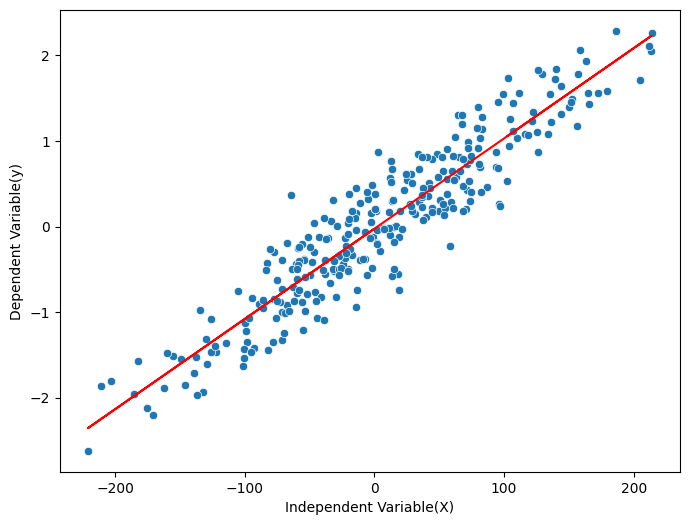

In [9]:
# plot the predicted line
# ပုံ၏ အရွယ်အစားကို အလျား ၈ လက်မ၊ အနံ ၆ လက်မ သတ်မှတ်ခြင်း
plt.figure(figsize=(8,6))

# မူလ Data (x, y) များကို အပြာရောင် အစက်ကလေးများဖြင့် အရင်ဆွဲခြင်း
sns.scatterplot(x=df.x, y=df.y)

# ခန့်မှန်းရရှိထားသော y_pred_cal ကို အသုံးပြုပြီး အနီရောင်မျဉ်းဖြောင့် ('r-') ဆွဲခြင်း
plt.plot(df.x, y_pred_cal, 'r-')

# X-axis နှင့် Y-axis တို့တွင် နာမည်များ သတ်မှတ်ခြင်း
plt.xlabel("Independent Variable(X)")
plt.ylabel("Dependent Variable(y)")

# ပုံကို ထုတ်ပြခြင်း
plt.show()